#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row: 

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


### Questions for Analysis

- Does the gender affect showing up of the patient?
- What is percentage of patients who diagnosed with Diabetes, Hipertension, Alcoholism, and Handcap?
- Does receiving sms affect showing up in the appointment based on the gender?
- Does the age of the paitent affect showing up in the appointment day?
- Is the duration between regestiration and appointment affect the ability to show up?
- Where is the most appointments take place?
- Is the alcohol drinking may be the cause of missing out the appointements?

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly error data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Exploring general properties about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### Quality:

- this shows that we have 14 columns in total besides index, and we have 110527 record.
- None of the data fields have NULL values.
- Datatype should be changed for both "ScheduledDay" and "AppointmentDay".
- patientId is float while it supposed to be an integer.

### Assessment

#### Check Duplicates

In [5]:
df.duplicated().sum()

0

##### Outcomes:

- There is no duplicate rows in this dataset.

#### Get statistical data about each column

In [6]:
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474961e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560943e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.920000e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.170000e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.170000e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.440000e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN



- Age has a one or more negative value which makes no sense, so it need to be removed.

- Age variate from -1 to 115 so we have a wide range of ages to investigate.

- "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", and "SMS_received" are encoded in form of zeros and ones, thats why it has type of int64.

- gender has 2 unique values "F" and "M" and the most frequent one is "F" which means data have more data on women than men.

- Show up has 2 unique values "yes" or "No and the most frequent one is "No" which means that most of patients show up on their appointements.

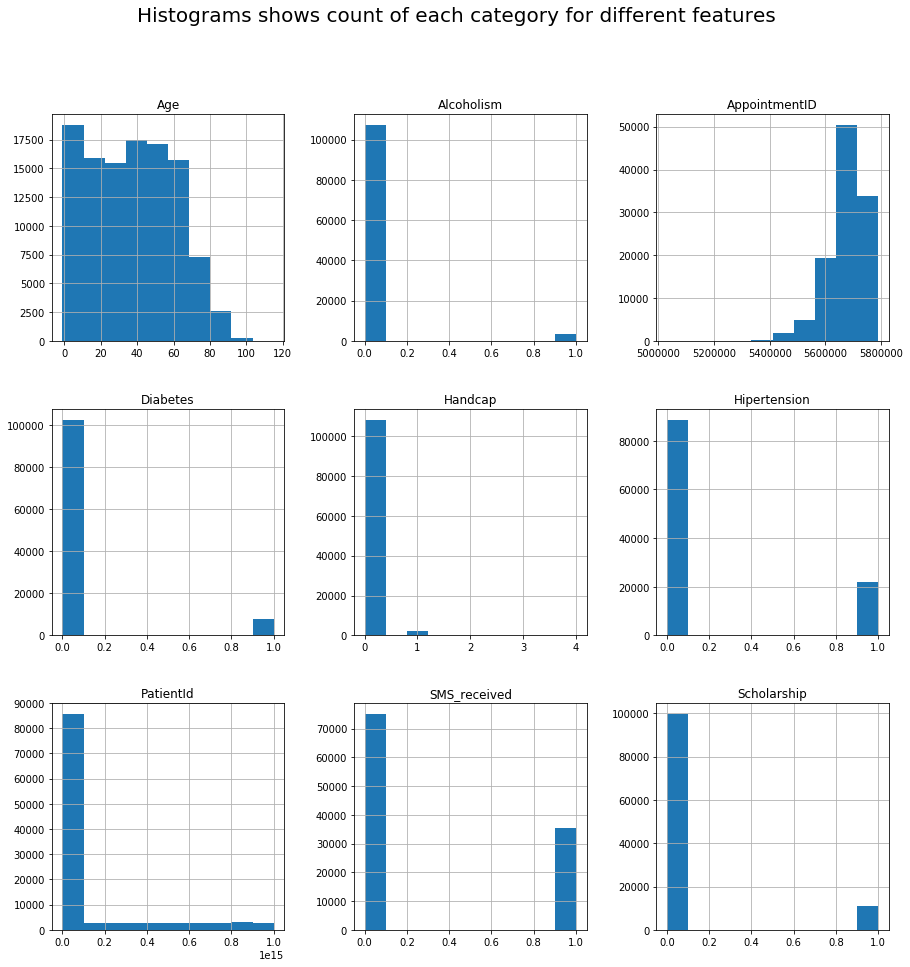

In [7]:
#draw Histogram to show distribution of data for each feature:

df.hist(figsize=(15,15))
plt.suptitle('Histograms shows count of each category for different features', fontsize=20);

##### Assessments:

- AppointmentId and PatientId have no statistical meanings that's why we need to change their datatype into strings.
- Age date is right skewed wich means data includes more young patients than old!
- Percentage of Alcoholisim and Handcap is extremly low among patients in this dataset.
- Percentage of patients who have diabetes and patients who have a scholarship doesn't exceed 5%.
- Percentage of patients who have hipertension as around 23%.
- SMS have been sent to more than 30% of cases.

### Data Cleaning
##### 1- Edit the "No-show" Column to be in Positive form instead of Negativity:

In [8]:
# edit the reversed meaning of No show to be positive,
# 0 will mean that patient didn't come to his appointement.
# 1 will mean that patient came to his appointment.

df['No-show'].replace({'Yes':0, 'No':1}, inplace=True)

In [9]:
# change datatype for column to be numeric integer.
df["No-show"] = pd.to_numeric(df["No-show"])

In [10]:
# rename column to give positive meaning.
df.rename(columns={"No-show":"Show_up"}, inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1


##### Renaming some columns

In [11]:
# Adjust the columns format 
# made all columns in lower cases
df.rename(columns={'PatientId':'Patient_Id', 'AppointmentID':'Appointment_ID', 'ScheduledDay':'Scheduled_Day', 'AppointmentDay':'Appointment_Day'}, inplace=True)
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
show_up            110527 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


##### 2- Edit the "Scheduled_Day", and "Appointment_Day" Columns' Datatype to be Datetime:

In [13]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])


In [14]:
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null datetime64[ns, UTC]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
show_up            110527 non-null int64
dtypes: datetime64[ns, UTC](2), float64(1), int64(9), object(2)
memory usage: 11.8+ MB


##### 3- Edit the "patient_id", "appointment_id" Columns' Datatype to be String:

In [16]:
df['patient_id'] = df['patient_id'].apply(str)

In [17]:
df['appointment_id'] = df['appointment_id'].apply(str)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null object
appointment_id     110527 non-null object
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null datetime64[ns, UTC]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
show_up            110527 non-null int64
dtypes: datetime64[ns, UTC](2), int64(8), object(4)
memory usage: 11.8+ MB


In [19]:
# make sure of datatype changed.
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
0,29900000000000.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,559000000000000.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4260000000000.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,868000000000.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8840000000000.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [20]:
df.describe(include="all")

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
count,110527,110527,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
unique,6100,110527,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,822000000000000.0,5786750,F,2016-05-06 07:09:54+00:00,2016-06-06 00:00:00+00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,141,1,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,NaN,NaN,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


##### Outcomes:
- there is only 6100 unique Patient_ID which means that same person may rescedule their appointment and show up in second or third time!

##### 4- Remove Row(s) with Negative Age Value(s):

In [21]:
# show columns with this problem
df[df['age'] < 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
99832,466000000000000.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [22]:
# drop the column with index
df = df.drop([99832])

In [23]:
# make sure that row has been dropped
df[df["age"] < 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up


### Analysis

In [24]:
df.groupby(['gender', 'show_up']).count()['patient_id']

gender  show_up
F       0          14594
        1          57245
M       0           7725
        1          30962
Name: patient_id, dtype: int64

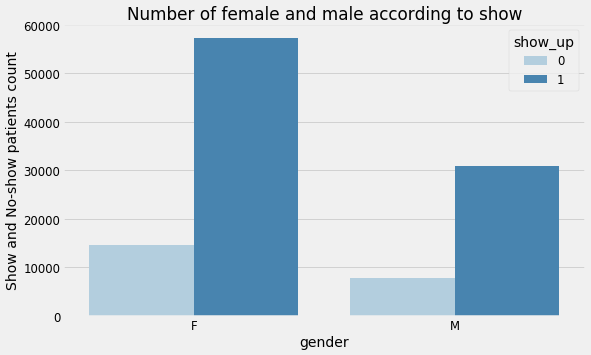

In [25]:

plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,6), dpi=60)

sns.countplot(data= df, x= 'gender', hue='show_up', palette= 'Blues')

plt.title('Number of female and male according to show')
plt.ylabel('Show and No-show patients count')
plt.show()

This is just an overall count of the gender according to showing up in the appoinment day or not. but to know the answer if the gender affect showing up or not I need to calculate the precentage of both of them.

In [26]:
# this just to get the count of gender and i use patient_id to help me count the number of female and male

gender_count = df.groupby('gender').count()['patient_id']
gender_count

gender
F    71839
M    38687
Name: patient_id, dtype: int64

##### What is the percentage of patients who show up on their appointements vs. who don't?

In [27]:
# count of patients who showed up on thier appoinments.
Num_show_up = df[df["show_up"]==1].count()["patient_id"]

# count of patients who didn't show up on thier appoinments.
Num_no_show_up = df[df["show_up"]==0].count()["patient_id"] 

print(Num_show_up,Num_no_show_up)

88207 22319


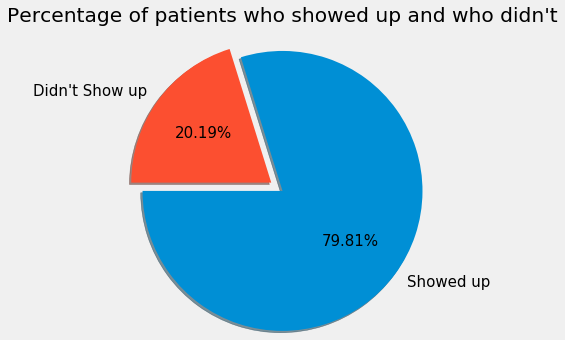

In [28]:
label_Names = ["Showed up", "Didn't Show up"]
data = [Num_show_up, Num_no_show_up]

#only explode the didn't show up slice.
explode = (0, 0.15) 

#to keep aspect ratio equal to appear as a fine circle.
plt.axis('equal'); 

plt.pie(data, radius=1.5, shadow=True, labels=label_Names, explode=explode, startangle=180, autopct='%0.2f%%', textprops={"fontsize":15})
#autopct to show percentage, 0.2 for two decimal place

plt.title("Percentage of patients who showed up and who didn't",y=1.2);


Answer:
- Percentage of patients who show up on their appointments represents 79.8%
- Percentage of patients who Don't show up on their appointments represents 20.2%

##### Do certain gender has more commitment to medical schedules than the other one?

In [29]:
#count each gender patients who showed up and who didn't

count_gender = df.groupby(["gender","show_up"]).count() 
count_gender.head()

patient_id  appointment_id  scheduled_day  appointment_day  \
gender show_up                                                               
F      0             14594           14594          14594            14594   
       1             57245           57245          57245            57245   
M      0              7725            7725           7725             7725   
       1             30962           30962          30962            30962   

                  age  neighbourhood  scholarship  hipertension  diabetes  \
gender show_up                                                              
F      0        14594          14594        14594         14594     14594   
       1        57245          57245        57245         57245     57245   
M      0         7725           7725         7725          7725      7725   
       1        30962          30962        30962         30962     30962   

                alcoholism  handcap  sms_received  
gender show_up                                     
F      0             14594    14594         14594  
       1             57245    57245         57245  
M      0              7725     7725          7725  
       1             30962    30962         30962

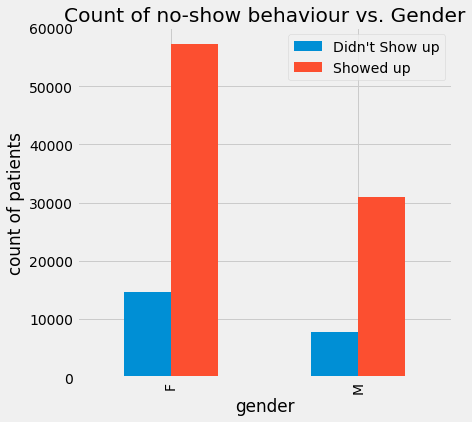

In [30]:
# plot for the grouped dataframe
count_gender["patient_id"].unstack().plot(kind="bar", stacked=False, figsize=(6,6), grid=True) 

# change title for the plot
plt.title("Count of no-show behaviour vs. Gender") 

# change legend for each color of data
plt.legend(["Didn't Show up", "Showed up"]);
plt.ylabel("count of patients");

##### Outcomes:
- this graph shows that most women shows up on their appointment and so do men.
- we need to calculate the porpotion ber each gender to be able to compare.

In [31]:
# new dataframe holds female data only.
df_female = df[df["gender"]=="F"] 

# count of all females in data.
Num_F = df_female["patient_id"].count() 

In [32]:
# new dataframe holds female who showed up only.
df_Female_show = df_female[df_female["show_up"] == 1]

# count of females who showed up on their appointments
Num_F_show = df_Female_show["show_up"].sum()

In [33]:
# calculate percentage of females who attend their appointments among all females in the data
Female_Show_Percent = round((Num_F_show/Num_F) * 100,2)

print("Percentage of Females who show up on their appointments is around {}% of all female patients.".format(Female_Show_Percent))

Percentage of Females who show up on their appointments is around 79.69% of all female patients.


In [34]:
df_Male = df[df["gender"]=="M"]        # new dataframe holds male data only.
Num_M = df_Male["patient_id"].count()  # count of all males in data.

In [35]:
df_Male_show = df_Male[df_Male["show_up"] == 1] # new dataframe holds male who showed up only.
Num_M_show = df_Male_show["show_up"].sum()      # count of males who showed up on their appointments

In [36]:
# calculate percentage of females who attend their appointments among all females in the data
Male_Show_Percent = round((Num_M_show/Num_M) * 100,2)
print("Percentage of Males who show up on their appointments is around {}% of all male patients.".format(Male_Show_Percent))

Percentage of Males who show up on their appointments is around 80.03% of all male patients.


##### Answer:
- Both genders have same commitment to medical schedules.

##### Is the duration between registeration and appointment affect the ability to show up?

To answer this question we need to add new column contain the duration between regestiration and appointment

In [37]:
# .dt.date to differ only date part
df["duration"] = (df["appointment_day"].dt.date) - (df["scheduled_day"].dt.date)

In [38]:
# to convert column to numerical column contain number of days
df["duration"] = df["duration"].dt.days 
df.head() 

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up,duration
0,29900000000000.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,559000000000000.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4260000000000.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,868000000000.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8840000000000.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


In [39]:
df.groupby("show_up").mean()["duration"]

show_up
0    15.831489
1     8.754759
Name: duration, dtype: float64

##### Quality:
- Patients Who didn't show up have an average of 15 days between registeration day and their appointments.
- Patients Who show up have an average of 8 days between registeration day and their appointments.

- As Duration increases, the ability of patients to show up on their appointments decreases.

##### Where is the most appointments take place?

In [40]:
df.describe(include="all")

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up,duration
count,110526,110526,110526,110526,110526,110526.000000,110526,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
unique,6100,110526,2,103548,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,822000000000000.0,5786750,F,2016-05-06 07:09:54+00:00,2016-06-06 00:00:00+00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,141,1,71839,24,4691,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,37.089219,NaN,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066,10.183794
std,NaN,NaN,NaN,NaN,NaN,23.110026,NaN,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,15.255034
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


##### Answer:
- "JARDIM CAMBURI" is the most frequent place.

##### Do older patients more commited to medical schedules than others?

In this Section we need to make segmentation for age to categories:

- below 18, 18-24, 25-34, 35-44, 45-54, 55-64, more than 65.

In [41]:
def dataframe_age(data,column,l1,l2):
    """This function returns a new dataframe from an input dataframe and apply a condition
    to a certain column to be whithin 2 numerical limits
    ------------------------------------
    input:
    ------
    data:   original data frame that you want to make a supset from it.
    column: column name in the original data frame that we will apply limit condition to. (Case Sensitive)
    l1: the lower limit of the column.
    l2: the higher limit of the column.
    
    output:
    ------
    a new dataframe with all columns in the original one but only the rows which meet the condition.
    """
    
    if l2<l1:
        l1,l2 = l2,l1
    return data.query("{} <= {} <= {}".format(l1,column,l2))

In [42]:
# get dataframes for each age category

childs = df.query("age < 18")
age_18_24 = dataframe_age(df,"age",18,24)
age_25_34 = dataframe_age(df,"age",25,34)
age_35_44 = dataframe_age(df,"age",35,44)
age_45_54 = dataframe_age(df,"age",45,54)
age_55_64 = dataframe_age(df,"age",55,64)
old = df.query("age >= 65")

In [43]:
# calculate mean for each age category

mean_childs = childs["show_up"].mean()
mean_18_24 = age_18_24["show_up"].mean()
mean_25_34 = age_25_34["show_up"].mean()
mean_35_44 = age_35_44["show_up"].mean()
mean_45_54 = age_45_54["show_up"].mean()
mean_55_64 = age_55_64["show_up"].mean()
mean_old = old["show_up"].mean()

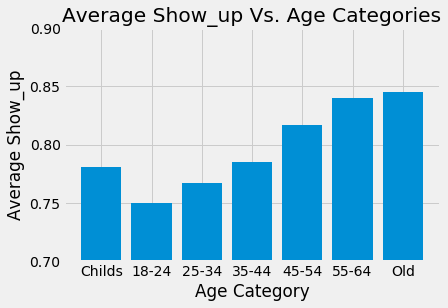

In [44]:
# draw Bar plot for the data

locations = [1, 2, 3, 4, 5, 6, 7]
heights = [mean_childs, mean_18_24, mean_25_34, mean_35_44, mean_45_54, mean_55_64, mean_old]
labels = ["Childs","18-24","25-34", "35-44", "45-54", "55-64", "Old"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Show_up Vs. Age Categories')

plt.ylim([0.7,0.9]) #to focus on this spot to feel the change
plt.xlabel('Age Category')
plt.ylabel('Average Show_up');

##### Answer:
- Yes, older patients are more commited to their appointments' schedules than younger ones.

##### Do patients who recieves SMS to remind them of the appointement more likely to show up?

In [45]:
df_SMS=df[df["sms_received"]==1]["show_up"].mean()
df_No_SMS=df[df["sms_received"]==0]["show_up"].mean()

In [46]:
# percentage of people who show up with recieving SMS.
df_SMS

0.7242545516036301

In [47]:
df_No_SMS

0.8329646607323703

- I thought that SMS would be effective. we should ivestigate more on age recieving the SMS and ivestigate duration too.

#### Below 18

In [48]:
df_SMS = df.loc[(df["sms_received"]==1) & (df["age"] < 18)]["show_up"].mean()         #Childs patients who recieved SMS
df_No_SMS = df.loc[(df["sms_received"]==0) & (df["age"]<18)]["show_up"].mean()        #Childs patients who haven't recieved SMS
print("Show_up percentage with SMS is {}%, while {}%  without SMS.".format(round(df_SMS*100,2), round(df_No_SMS*100,2)))

Show_up percentage with SMS is 69.77%, while 81.55%  without SMS.


#### 18-24



In [49]:
df_SMS = df.loc[(df["sms_received"]==1) & (df["age"] >= 18) & (df["age"] <=24)]["show_up"].mean()      #18-24 who recieved SMS
df_No_SMS = df.loc[(df["sms_received"]==0) & (df["age"] >= 18) & (df["age"] <=24)]["show_up"].mean()   #18-24 patients who recieved SMS
print("Show_up percentage with SMS is {}%, while {}%  without SMS.".format(round(df_SMS*100,2), round(df_No_SMS*100,2)))

Show_up percentage with SMS is 63.23%, while 81.13%  without SMS.


#### 25-34



In [50]:
df_SMS = df.loc[(df["sms_received"]==1) & (df["age"] >= 25) & (df["age"] <=34)]["show_up"].mean()       #25-34 who recieved SMS
df_No_SMS = df.loc[(df["sms_received"]==0) & (df["age"] >= 25) & (df["age"] <=34)]["show_up"].mean()    #25-34 patients who recieved SMS
print("Show_up percentage with SMS is {}%, while {}%  without SMS.".format(round(df_SMS*100,2), round(df_No_SMS*100,2)))

Show_up percentage with SMS is 67.35%, while 81.57%  without SMS.


#### 35-44



In [51]:
df_SMS = df.loc[(df["sms_received"]==1) & (df["age"] >= 35) & (df["age"] <=44)]["show_up"].mean()         #35-44 who recieved SMS
df_No_SMS = df.loc[(df["sms_received"]==0) & (df["age"] >= 35) & (df["age"] <=44)]["show_up"].mean()      #35-44 patients who recieved SMS
print("Show_up percentage with SMS is {}%, while {}%  without SMS.".format(round(df_SMS*100,2), round(df_No_SMS*100,2)))

Show_up percentage with SMS is 69.8%, while 82.88%  without SMS.


#### 45-54



In [52]:
df_SMS = df.loc[(df["sms_received"]==1) & (df["age"] >= 45) & (df["age"] <=54)]["show_up"].mean()       #45-54 who recieved SMS
df_No_SMS = df.loc[(df["sms_received"]==0) & (df["age"] >= 45) & (df["age"] <=54)]["show_up"].mean()    #45-54 patients who recieved SMS
print("Show_up percentage with SMS is {}%, while {}%  without SMS.".format(round(df_SMS*100,2), round(df_No_SMS*100,2)))

Show_up percentage with SMS is 76.31%, while 84.35%  without SMS.


#### 55-64



In [53]:
df_SMS = df.loc[(df["sms_received"]==1) & (df["age"] >= 55) & (df["age"] <=64)]["show_up"].mean()      #55-64 who recieved SMS
df_No_SMS = df.loc[(df["sms_received"]==0) & (df["age"] >= 55) & (df["age"] <=64)]["show_up"].mean()   #55-64 patients who recieved SMS
print("Show_up percentage with SMS is {}%, while {}%  without SMS.".format(round(df_SMS*100,2), round(df_No_SMS*100,2)))

Show_up percentage with SMS is 79.75%, while 86.08%  without SMS.


#### More than 65



In [69]:
df_SMS = df.loc[(df["sms_received"]==1) & (df["age"] >=65)]["show_up"].mean()            #olders patients who recieved SMS
df_No_SMS = df.loc[(df["sms_received"]==0) & (df["age"]>=65)]["show_up"].mean()          #olders patients who recieved SMS
print("Show_up percentage with SMS is {}%, while {}%  without SMS.".format(round(df_SMS*100,2), round(df_No_SMS*100,2)))

Show_up percentage with SMS is 80.31%, while 86.34%  without SMS.


#### Outcomes:
- it seems like the percentage of Show ups increase with SMS with increasing age.

#### Let's Explore duration effect

In [55]:
median_duration = df.groupby("show_up").mean()["duration"][0]

#### In case of low durations:



In [56]:
df_SMS = df.loc[(df["sms_received"] ==1) & (df["duration"] <= median_duration)]["show_up"].mean()    
df_No_SMS = df.loc[(df["sms_received"] ==0) & (df["duration"] <= median_duration)]["show_up"].mean()
print("Show_up percentage with SMS is {}%, while {}%  without SMS.".format(round(df_SMS*100,2), round(df_No_SMS*100,2)))

Show_up percentage with SMS is 74.33%, while 86.52%  without SMS.


#### In case of large durations:

In [57]:
df_SMS = df.loc[(df["sms_received"] ==1) & (df["duration"] >= median_duration)]["show_up"].mean() 
df_No_SMS = df.loc[(df["sms_received"] ==0) & (df["duration"] >= median_duration)]["show_up"].mean() 
print("Show_up percentage with SMS is {}%, while {}%  without SMS.".format(round(df_SMS*100,2), round(df_No_SMS*100,2)))

Show_up percentage with SMS is 70.11%, while 62.9%  without SMS.


#### Outcomes:
- Percentage of patients who shows up increases when the duration is larger.

##### Answer:
- percentage of Shows up increase with SMS with increasing age.
- Percentage of patients who shows up increases when the duration is larger.


##### What is percentage of patients who diagnosed with Diabetes, Hipertension, Alcoholism, and Handcap?

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
patient_id         110526 non-null object
appointment_id     110526 non-null object
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns, UTC]
appointment_day    110526 non-null datetime64[ns, UTC]
age                110526 non-null int64
neighbourhood      110526 non-null object
scholarship        110526 non-null int64
hipertension       110526 non-null int64
diabetes           110526 non-null int64
alcoholism         110526 non-null int64
handcap            110526 non-null int64
sms_received       110526 non-null int64
show_up            110526 non-null int64
duration           110526 non-null int64
dtypes: datetime64[ns, UTC](2), int64(9), object(4)
memory usage: 18.5+ MB


In [59]:
# number of data records
all_count = 110526       

In [60]:
#percentage of people diagnosed with Diabetes
diabets_count = df[df["diabetes"]==1]["patient_id"].count()
diabetes_percent = round(diabets_count*100/all_count,2) 

print("Percentage of patients who diagnosed with Diabetes is {}%.".format(diabetes_percent))

Percentage of patients who diagnosed with Diabetes is 7.19%.


In [61]:
#percentage of people diagnosed with Diabetes
diabets_count = df[df["hipertension"]==1]["patient_id"].count()
diabetes_percent = round(diabets_count*100/all_count,2)

print("Percentage of patients who diagnosed with Hipertension is {}%.".format(diabetes_percent))

Percentage of patients who diagnosed with Hipertension is 19.72%.


In [62]:
#percentage of people diagnosed with Diabetes
diabets_count = df[df["alcoholism"]==1]["patient_id"].count()
diabetes_percent = round(diabets_count*100/all_count,2)

print("Percentage of patients who diagnosed with Alcoholism is {}%.".format(diabetes_percent))

Percentage of patients who diagnosed with Alcoholism is 3.04%.


In [63]:
#percentage of people diagnosed with Diabetes
diabets_count = df[df["handcap"]==1]["patient_id"].count()
diabetes_percent = round(diabets_count*100/all_count,2)

print("Percentage of patients who diagnosed with Handcap is {}%.".format(diabetes_percent))

Percentage of patients who diagnosed with Handcap is 1.85%.


##### Is alcohol drinking may be a cause of missing out the appointements?

In [73]:
#count of patients with alchoholism who show up
alcohol_show = df.loc[(df["alcoholism"]==1) & (df["show_up"]==1)]["patient_id"].count() 

In [65]:
#count of patients with alchoholism who don't show up
alcohol_No_show = df.loc[(df["alcoholism"]==1) & (df["show_up"]==0)]["patient_id"].count()

In [66]:
#calculate percentages
alcohol_show_percent = round(alcohol_show*100 / all_count,2) 
alcohol_No_show_percent = round(alcohol_No_show*100 / all_count,2)

In [67]:
print("Percentage of shows up when patients have alchoholism is {}%, while not shows up is {}%.".format(alcohol_show_percent,alcohol_No_show_percent))

Percentage of show ups when patients have alchoholism is 2.43%, while not show ups is 0.61%.


##### Answer:
- it doesn't make them missing the appointments as most of them didn't miss theirs.

### Conclusions

#### Results:

- Percentage of patients who show up on their appointments represents 79.8%
- Percentage of patients who Don't show up on their appointments represents 20.2%
- Both genders have same commitment to medical schedules.
- Patients Who didn't show up have an average of 15 days between registeration day and their appointments.
- Patients Who show up have an average of 8 days between registeration day and their appointments.
- As Duration increases, the ability of patients to show up on their appointments decreases.
- "JARDIM CAMBURI" is the most frequent place.
- Older patients are more commited to their appointments' schedules than younger ones.